imports

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

config

In [70]:
config_datasheet_pre = r'./results/preprocessed_pretest.xlsx'
config_datasheet_post = r'./results/preprocessed_posttest.xlsx'

import df

In [71]:
raw_pre = pd.read_excel(config_datasheet_pre)
raw_post = pd.read_excel(config_datasheet_post)
df_pre = pd.DataFrame(raw_pre)
df_post = pd.DataFrame(raw_post)

codes_pre = df_pre["Unique Code"].unique()
codes_post = df_post["Unique Code"].unique()

common_names = ["CommonChars", "ReverseArray", "BinarySearchStrings", "Multiples", "InsertionSort"]

for name in common_names:
    df_pre.replace(name, name+"-Pre",inplace=True)
    df_post.replace(name, name+"-Post",inplace=True)


df_result = pd.DataFrame()

codes_result_set = set(codes_pre) & set(codes_post)
codes_result = list(codes_result_set)

codes_result.sort()
codes_result.remove('5dHSfo')

counter = 0

for code in codes_result:
    tmp_pre = df_pre.loc[df_pre["Unique Code"]== code]
    tmp_post = df_post.loc[df_post["Unique Code"]==code]
    df_result = df_result.append(tmp_pre)
    df_result = df_result.append(tmp_post)

df_result.to_excel("results/compare.xlsx")

remove outliers

create result

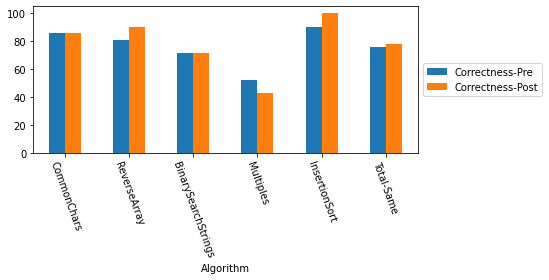

In [92]:
bar_df = pd.DataFrame([],columns=["Correctness-Pre", "Correctness-Post", "Algorithm"])

mean_pre_total = 0
mean_post_total = 0

for algo_name in common_names:
    mean_pre = float(df_result.loc[df_result["Algorithm"] == algo_name+"-Pre"]["Correctness"].mean()*100)
    mean_post = float(df_result.loc[df_result["Algorithm"] == algo_name+"-Post"]["Correctness"].mean()*100)
    mean_pre_total += mean_pre
    mean_post_total += mean_post
    
    bar_df = bar_df.append(pd.DataFrame([[mean_pre, mean_post, algo_name]], columns=["Correctness-Pre", "Correctness-Post", "Algorithm"]))

mean_pre_total /= len(common_names)
mean_post_total /= len(common_names)

bar_df = bar_df.append(pd.DataFrame([[mean_pre_total, mean_post_total, "Total-Same"]], columns=["Correctness-Pre", "Correctness-Post", "Algorithm"]))

bar_df = bar_df.set_index('Algorithm')
ax = bar_df.plot.bar(rot=290)
plt.tight_layout()
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/bar_correctness_of_compared_result.pdf", bbox_inches='tight', pad_inches=0.01)

ContainsSubstring
CountVowels
CrossSum
Swap
GreatestCommonDivisor


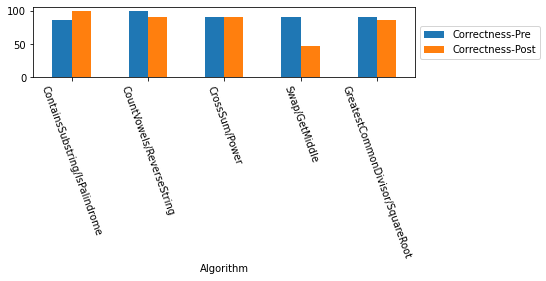

In [108]:
bar_df = pd.DataFrame([],columns=["Correctness-Pre", "Correctness-Post", "Algorithm"])

mean_pre_total = 0
mean_post_total = 0

algo_names_pre = ["ContainsSubstring", "CountVowels", "CrossSum", "Swap", "GreatestCommonDivisor"]
algo_names_post = ["IsPalindrome", "ReverseString", "Power", "GetMiddle", "SquareRoot"]


for i in range(len(algo_names_pre)):
    print(algo_names_pre[i])
    mean_pre = float(df_result.loc[df_result["Algorithm"] == algo_names_pre[i]]["Correctness"].mean()*100)
    mean_post = float(df_result.loc[df_result["Algorithm"] == algo_names_post[i]]["Correctness"].mean()*100)
    bar_df = bar_df.append(pd.DataFrame([[mean_pre, mean_post, algo_names_pre[i]+"/"+algo_names_post[i]]], columns=["Correctness-Pre", "Correctness-Post", "Algorithm"]))

#mean_pre_total /= len(common_names)
#mean_post_total /= len(common_names)

#bar_df = bar_df.append(pd.DataFrame([[mean_pre_total, mean_post_total, "Total-Same"]], columns=["Correctness-Pre", "Correctness-Post", "Algorithm"]))

bar_df = bar_df.set_index('Algorithm')
ax = bar_df.plot.bar(rot=290)
plt.tight_layout()
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/bar_correctness_of_compared_result_all.pdf", bbox_inches='tight', pad_inches=0.01)